In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\Saiteja Reddy\Downloads\macroeco.csv")

# Display the first few rows of the dataset
print("Data Sample:")
print(data.head())

Data Sample:
       date   GDP  weekly_earnings  int_rate  unemp_rate   yield  \
0  2007 Jan  84.0              421    5.1705         5.5  5.1419   
1  2007 Feb  84.2              426    5.2500         5.5  5.1621   
2  2007 Mar  84.5              417    5.2500         5.5  5.0758   
3  2007 Apr  84.7              413    5.2500         5.4  5.2787   
4  2007 May  84.8              416    5.4286         5.4  5.4112   

   deposits_rate  
0           2.99  
1           3.13  
2           3.10  
3           3.13  
4           3.14  


In [2]:
# Preprocess the dataset (handle missing values, if any)
data = data.dropna()

In [4]:
# Extract features and target variable
X = data[['GDP', 'unemp_rate', 'weekly_earnings', 'deposits_rate', 'yield']]
y = data['int_rate']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preparation Complete.")

Data Preparation Complete.


Generating Pairplot...


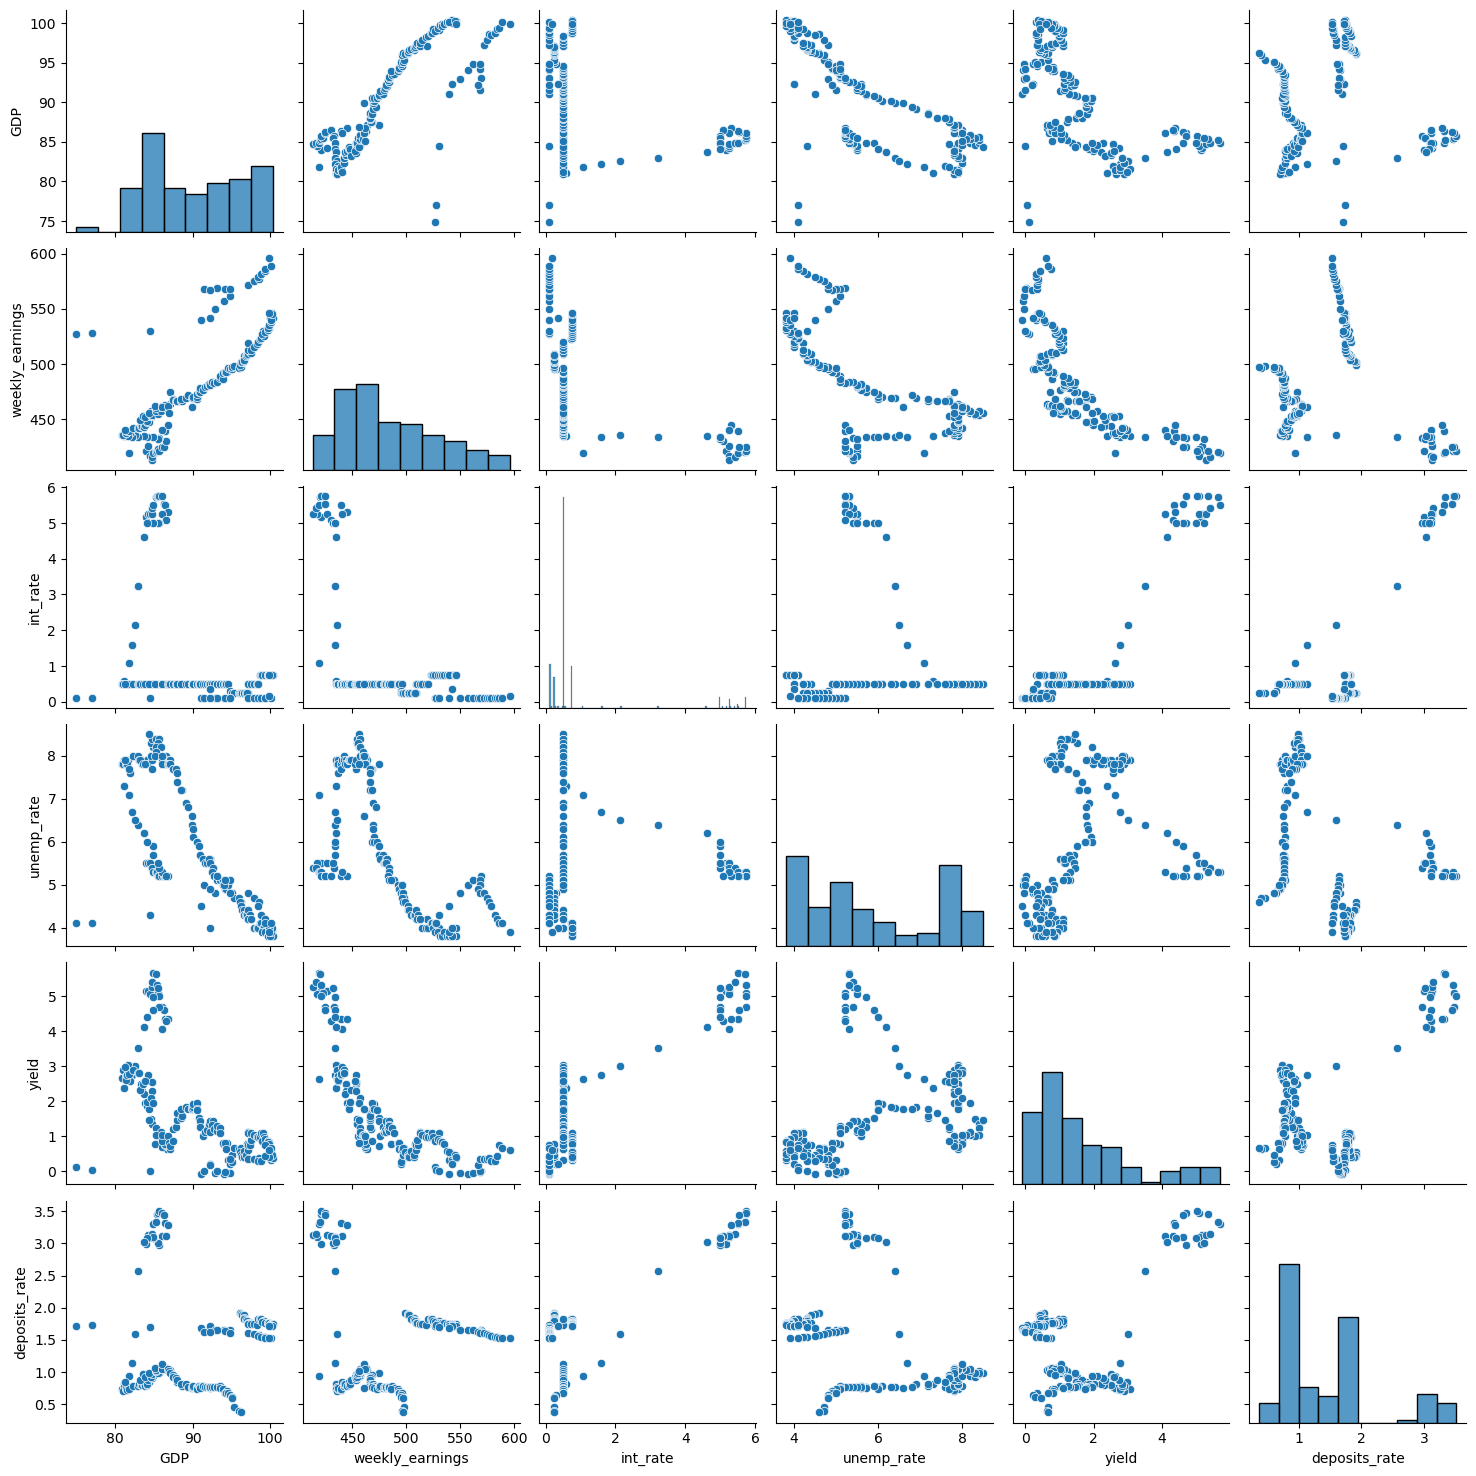

In [8]:
#Exploratory Data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
print("Generating Pairplot...")
sns.pairplot(data)
plt.show()

Generating Correlation Matrix...


C:\Users\Saiteja Reddy\AppData\Local\Temp\ipykernel_1804\1503703173.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


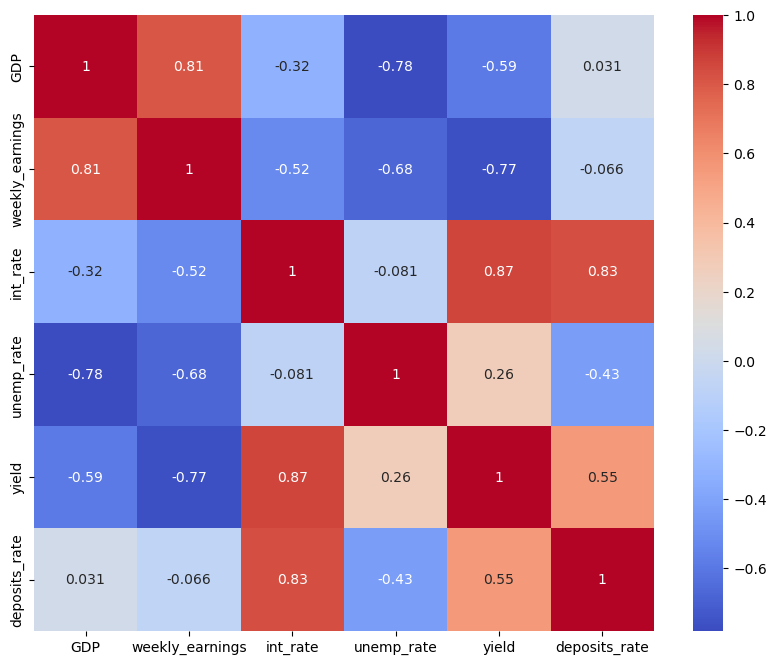

In [9]:
# Correlation matrix
print("Generating Correlation Matrix...")
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
#Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
print("Training Linear Regression Model...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regressor
print("Training Random Forest Regressor Model...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate models
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


Training Linear Regression Model...
Training Random Forest Regressor Model...
Linear Regression - MSE: 0.1510111354945607, R2: 0.9433435256108154
Random Forest - MSE: 0.07082908171633319, R2: 0.9734262904445518


In [14]:
pip install Prophet

     ---------------------------------------- 13.3/13.3 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 94.4/94.4 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\Saiteja Reddy\Downloads\macroeco.csv")

# Ensure the 'date' column is present and correctly named
if 'date' not in data.columns:
    print("Column names in the dataset:", data.columns)
    # Replace 'Date' with the actual column name if different
    data.rename(columns={'Date': 'date'}, inplace=True)

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# ARIMA model
print("Training ARIMA Model...")
arima_model = ARIMA(data['int_rate'], order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=12)

Training ARIMA Model...


C:\Users\Saiteja Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Saiteja Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Saiteja Reddy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
# Prophet model
print("Training Prophet Model...")
prophet_data = data.reset_index().rename(columns={'date': 'ds', 'int_rate': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)

14:21:39 - cmdstanpy - INFO - Chain [1] start processing
14:21:39 - cmdstanpy - INFO - Chain [1] done processing


Training Prophet Model...


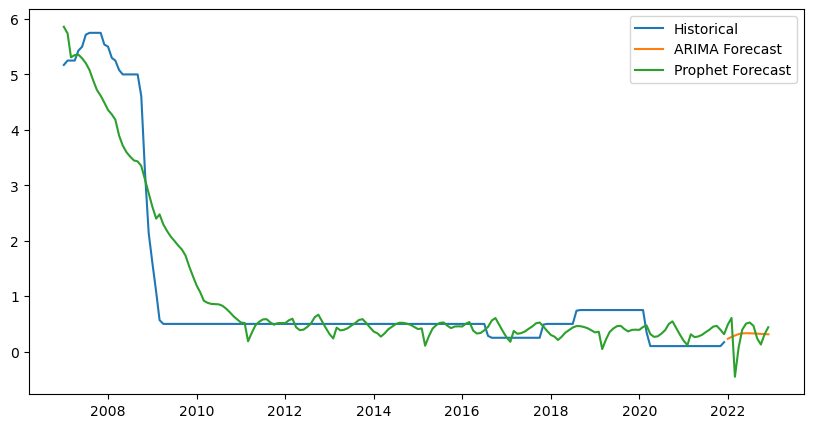

In [22]:
# Plot the forecasts
plt.figure(figsize=(10, 5))
plt.plot(data['int_rate'], label='Historical')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast')
plt.legend()
plt.show()

C:\Users\Saiteja Reddy\AppData\Local\Temp\ipykernel_1804\2780394316.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  perturbed_X.iloc[:, feature_idx] *= (1 + perturbation)


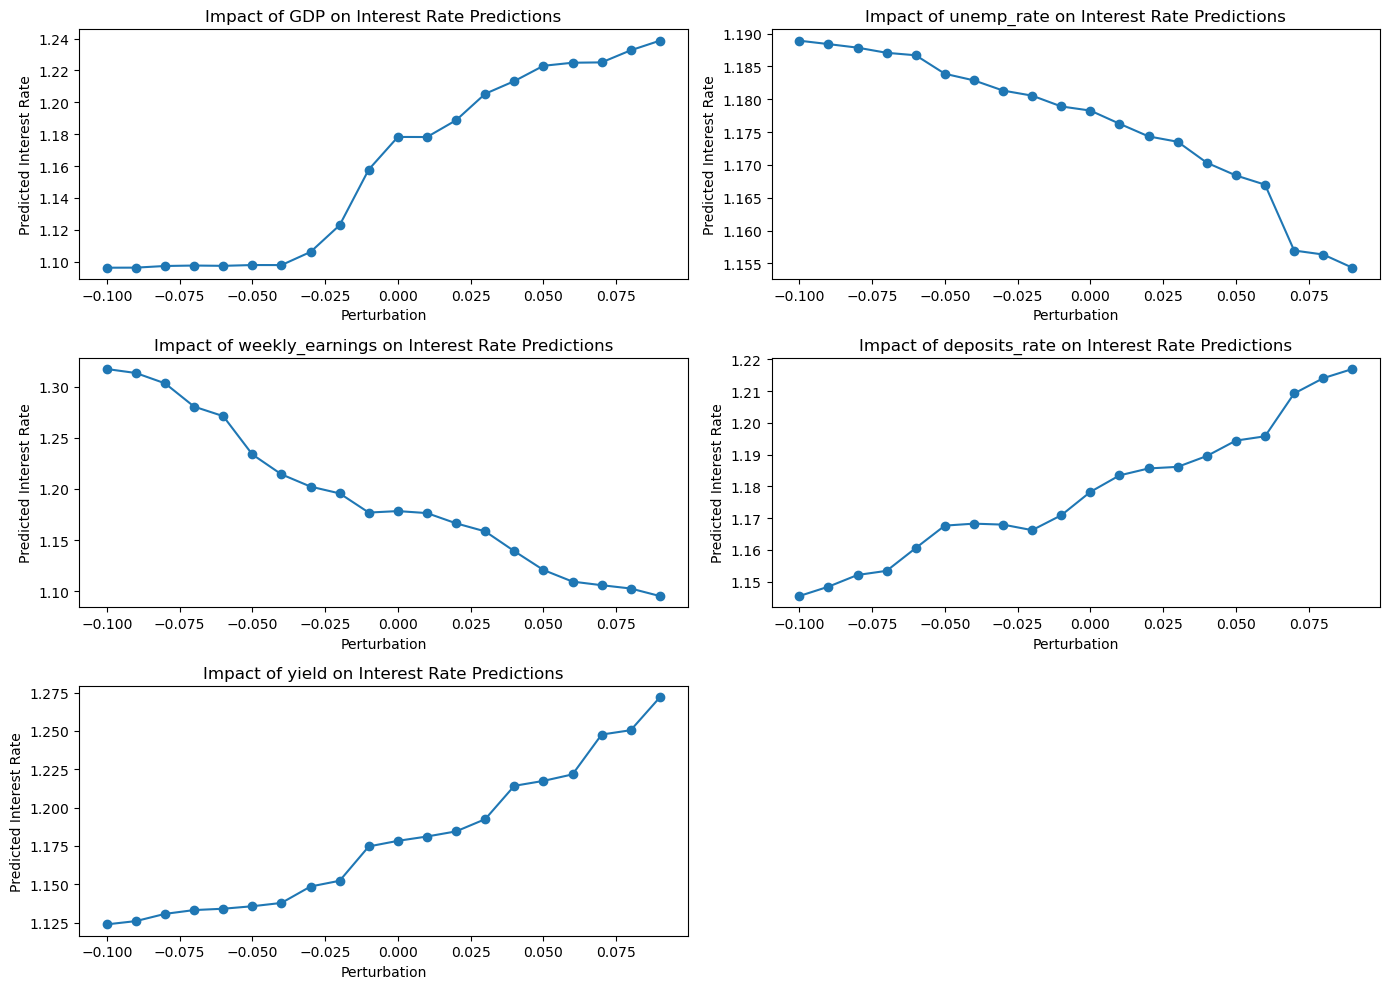

In [23]:
import numpy as np

# Define perturbation range (e.g., Â±10% of the original value)
perturbation_range = 0.1

# Function to create perturbed datasets
def create_perturbed_datasets(X, feature_name, perturbation_range):
    perturbed_datasets = []
    feature_idx = X.columns.get_loc(feature_name)
    
    for perturbation in np.arange(-perturbation_range, perturbation_range, 0.01):
        perturbed_X = X.copy()
        perturbed_X.iloc[:, feature_idx] *= (1 + perturbation)
        perturbed_datasets.append((perturbation, perturbed_X))
    
    return perturbed_datasets

# Create perturbed datasets for each feature
perturbed_datasets_dict = {feature: create_perturbed_datasets(X_test, feature, perturbation_range) for feature in X.columns}

# Function to measure impact of perturbations
def measure_impact(rf, scaler, X_test, perturbed_datasets_dict):
    impact_results = {}
    
    for feature, perturbed_datasets in perturbed_datasets_dict.items():
        impacts = []
        for perturbation, perturbed_X in perturbed_datasets:
            perturbed_X_scaled = scaler.transform(perturbed_X)
            perturbed_predictions = rf.predict(perturbed_X_scaled)
            average_perturbed_prediction = np.mean(perturbed_predictions)
            impacts.append((perturbation, average_perturbed_prediction))
        
        impact_results[feature] = impacts
    
    return impact_results

# Measure impact
impact_results = measure_impact(rf, scaler, X_test, perturbed_datasets_dict)

# Function to plot impact results
def plot_impact_results(impact_results):
    plt.figure(figsize=(14, 10))
    
    for i, (feature, impacts) in enumerate(impact_results.items()):
        perturbations, predictions = zip(*impacts)
        plt.subplot(3, 2, i + 1)
        plt.plot(perturbations, predictions, marker='o')
        plt.title(f'Impact of {feature} on Interest Rate Predictions')
        plt.xlabel('Perturbation')
        plt.ylabel('Predicted Interest Rate')
    
    plt.tight_layout()
    plt.show()

# Plot impact results
plot_impact_results(impact_results)
